In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os.path as osp
import pandas as pd

In [2]:
ROOT = './'

csv_data = glob.glob(f"{osp.join(ROOT, 'processed_data', '*.csv')}")
assert len(csv_data) > 0, "No csv files are found"

print(f"Found {len(csv_data)} csv files")

Found 8 csv files


In [3]:
AGE_CSV = '/Users/kctey/Desktop/NUS Y4S1/BN4101/UK_Biobank/processed_data/age.csv'

df = None
for filepath in sorted(csv_data)[::-1]:
    if df is None:
        df = pd.read_csv(filepath)
    else:
        tmp_df = pd.read_csv(filepath)
        
        # inner join age dataframe
        if filepath == AGE_CSV:
            how = 'inner'
        else:
            how = 'outer'  # outer join all cognitive tests and use imputation to fill missing values

        df = df.merge(tmp_df, on='subject_id', how=how)

In [4]:
df

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,Education,age
0,1000085,43.202,64.591,0.0,0.0,22.0,22.0,4.500000,1.000000,22838.0,9.0,0,6.0,1.0,51.0
1,1000158,48.845,96.175,3.0,5.0,5.0,17.0,4.500000,5.000000,35523.0,7.0,0,5.0,2.0,60.0
2,1000251,23.656,36.673,0.0,0.0,23.0,24.0,4.500000,4.000000,14591.0,8.0,1,10.0,4.0,53.0
3,1000279,25.344,51.384,0.0,1.0,25.0,25.0,5.666667,3.333333,21993.0,8.0,0,4.0,1.0,54.0
4,1000295,33.183,52.936,0.0,0.0,21.0,21.0,4.500000,6.000000,32468.0,7.0,0,6.0,1.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502406,6024887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,-7.0,65.0
502407,6024893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3.0,44.0
502408,6024902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3.0,44.0
502409,6024915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2.0,41.0


In [26]:
df.groupby(['gender'])['Education'].mean(), df.groupby(['gender'])['Education'].std()

(gender
 0    0.814727
 1    0.790038
 Name: Education, dtype: float64,
 gender
 0    3.833089
 1    3.889110
 Name: Education, dtype: float64)

# Feature Engineering
1. Accuracy Rate for symbol digit substitution
2. Accuracy rate for pair matching

### Total 9 cognitive related variables

In [5]:
# 1. symbol digit substitution -> calculate accuracy rate from correct digit matched and digit matched attempts
df['Symbol Digit Substitution Accuracy'] = df['Correct Digits matched']/df['Digit Match attempts']

# 2. Calculate accuracy -> mean correct pair/mean incorrect pair
df['Pair Matching Accuracy'] = df['Mean Correct Pair']/df['Mean Incorrect Pair']


# Dropping participants

1. Remove participants from trail making with too high of a completion time 
2. Pair matching timing as -1 **(drop 2994) = 117043 + 2994 = 120037**
3. Participants who have sat for more than half the tests (arbitrary) **(left 117043)**

### First drop participants who did not even complete half the tests

In [6]:
print("Length before droppping, ", len(df))
# drop participants who took less than 5 tests
drop_df = df.dropna(thresh=8)
print("Length after droppping, ", len(drop_df))

print("Dropped a total of ", len(df) - len(drop_df), " rows")

Length before droppping,  502411
Length after droppping,  121795
Dropped a total of  380616  rows


In [7]:
# drop participants with exceptionally high completion time
drop_df.sort_values('Mean Completion Time', ascending=False)

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,Education,age,Symbol Digit Substitution Accuracy,Pair Matching Accuracy
118755,5386189,NaN,NaN,NaN,NaN,0.0,14.0,4.5,4.5,94984.0,5.0,0,5.0,1.0,68.0,0.000000,1.000000
120377,5879067,NaN,NaN,NaN,NaN,14.0,16.0,4.5,10.0,94799.5,NaN,1,4.0,4.0,67.0,0.875000,0.450000
116857,4833827,NaN,NaN,NaN,NaN,16.0,16.0,4.5,13.0,94516.5,6.0,1,4.0,5.0,58.0,1.000000,0.346154
38808,2856528,82.976,100.688,1.0,0.0,10.0,10.0,4.5,5.0,92039.5,6.0,1,5.0,3.0,68.0,1.000000,0.900000
116981,4871679,NaN,NaN,NaN,NaN,14.0,14.0,4.5,7.5,91783.5,7.0,0,4.0,6.0,58.0,1.000000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120822,6006608,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,0,6.0,5.0,51.0,0.333333,NaN
120838,6012231,NaN,NaN,NaN,NaN,14.0,17.0,NaN,NaN,NaN,7.0,1,8.0,1.0,62.0,0.823529,NaN
120839,6012410,NaN,NaN,NaN,NaN,15.0,15.0,NaN,NaN,NaN,5.0,0,7.0,6.0,61.0,1.000000,NaN
120852,6015545,NaN,NaN,NaN,NaN,15.0,15.0,NaN,NaN,NaN,6.0,1,5.0,1.0,62.0,1.000000,NaN


On average, participants take 23623.355443540306 deciseconds to complete pair matching
At max, participants take 94984.0 deciseconds to complete pair matching
At least, participants take 2173.5 deciseconds to complete pair matching


Text(0.5, 1.0, 'Mean Completion Time box plot')

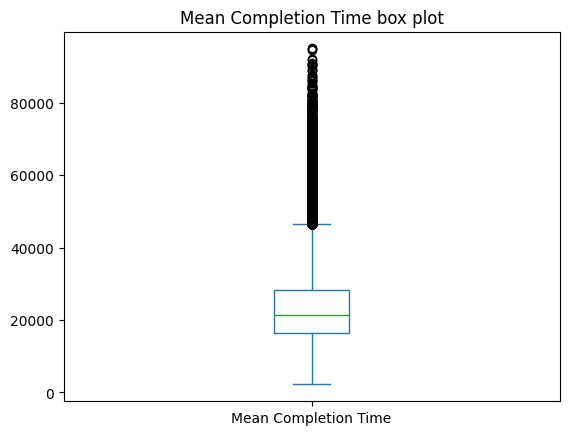

In [8]:
correct_45 = drop_df[drop_df['Mean Correct Pair'] == 4.5]['Mean Completion Time']
print(f"On average, participants take {correct_45.mean()} deciseconds to complete pair matching")
print(f"At max, participants take {correct_45.max()} deciseconds to complete pair matching")
print(f"At least, participants take {correct_45.min()} deciseconds to complete pair matching")

drop_df[drop_df['Mean Correct Pair'] == 4.5]['Mean Completion Time'].plot.box()
plt.title('Mean Completion Time box plot')

### Drop participants with completion time which are too high

In [9]:
# drop by quantile

drop_df[drop_df['Mean Completion Time'] > drop_df['Mean Completion Time'].quantile(0.9)]

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,Education,age,Symbol Digit Substitution Accuracy,Pair Matching Accuracy
7,1000403,30.462,48.507,0.0,0.0,22.0,22.0,4.500000,7.500000,38399.000000,7.0,1,4.0,1.0,41.0,1.0,0.600000
13,1000696,23.612,33.078,0.0,0.0,24.0,24.0,5.666667,3.333333,38399.666667,7.0,0,9.0,1.0,55.0,1.0,1.700000
17,1000952,38.377,68.022,0.0,0.0,15.0,15.0,4.500000,3.500000,51749.000000,7.0,0,6.0,4.0,54.0,1.0,1.285714
26,1001446,53.991,66.607,0.0,0.0,16.0,16.0,4.500000,3.000000,40940.500000,8.0,1,7.0,2.0,60.0,1.0,1.500000
70,1003545,38.307,76.761,0.0,1.0,14.0,14.0,4.500000,6.500000,45198.500000,8.0,0,7.0,1.0,68.0,1.0,0.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121803,5829880,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,4.500000,45153.000000,6.0,0,5.0,1.0,61.0,NaN,1.000000
121805,5848654,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,6.000000,70514.500000,7.0,1,2.0,2.0,65.0,NaN,0.750000
121823,5946126,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,4.000000,47704.500000,NaN,0,NaN,4.0,50.0,NaN,1.125000
121838,6009918,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,6.000000,36960.000000,4.0,1,2.0,5.0,64.0,NaN,0.750000


In [10]:
drop_df = drop_df[drop_df['Mean Completion Time'] <= drop_df['Mean Completion Time'].quantile(0.9)]
print(f"Left with {len(drop_df)} rows")

Left with 103964 rows


In [11]:
cols_to_remove = [
    'Correct Digits matched', 'Digit Match attempts', 'Mean Correct Pair', 'Mean Incorrect Pair'
]
new_df = drop_df.drop(cols_to_remove, axis=1)
new_df

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,Education,age,Symbol Digit Substitution Accuracy,Pair Matching Accuracy
0,1000085,43.202,64.591,0.0,0.0,22838.000000,9.0,0,6.0,1.0,51.0,1.000000,4.500
1,1000158,48.845,96.175,3.0,5.0,35523.000000,7.0,0,5.0,2.0,60.0,0.294118,0.900
2,1000251,23.656,36.673,0.0,0.0,14591.000000,8.0,1,10.0,4.0,53.0,0.958333,1.125
3,1000279,25.344,51.384,0.0,1.0,21993.000000,8.0,0,4.0,1.0,54.0,1.000000,1.700
4,1000295,33.183,52.936,0.0,0.0,32468.000000,7.0,0,6.0,1.0,57.0,1.000000,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121836,6000260,NaN,NaN,NaN,NaN,15661.500000,5.0,1,4.0,-7.0,62.0,NaN,3.000
121837,6001089,NaN,NaN,NaN,NaN,14432.000000,7.0,0,5.0,3.0,55.0,NaN,2.250
121839,6011793,NaN,NaN,NaN,NaN,16046.500000,7.0,0,6.0,6.0,66.0,NaN,2.250
121841,6014493,NaN,NaN,NaN,NaN,21785.000000,6.0,0,6.0,3.0,64.0,NaN,2.250


In [12]:
# use this new_df as the master dataset
new_df.to_csv('master.csv', index=False)

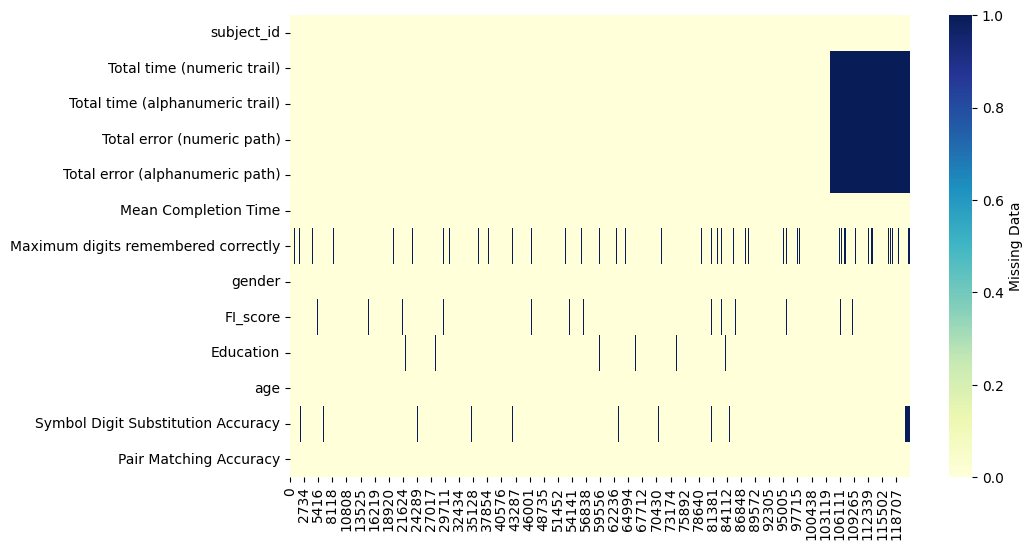

In [13]:
# visualize missing values

plt.figure(figsize=(10,6))
sns.heatmap(new_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

<AxesSubplot:>

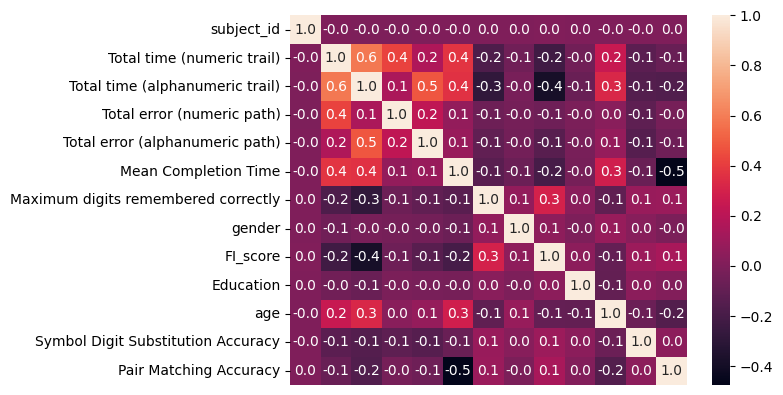

In [14]:
matrix = new_df.corr()
sns.heatmap(matrix, annot=True, fmt=".1f", xticklabels=False)


In [15]:
from scipy.stats import *
male_fi = new_df[new_df['gender'] == 1]['FI_score'].dropna()
female_fi = new_df[new_df['gender'] == 0]['FI_score'].dropna()
twotail = ttest_ind(male_fi, female_fi, equal_var=True)
twotail

Ttest_indResult(statistic=16.96868061694174, pvalue=1.7155392897764528e-64)

In [16]:
print("female: ", female_fi.mean(), female_fi.std(), len(female_fi))
print("male: ", male_fi.mean(), male_fi.std(), len(male_fi))

female:  6.4813164149888145 1.988308162240329 57216
male:  6.697636027469625 2.078394811375244 45432


In [17]:
new_df.age.describe()

count    103964.000000
mean         55.502222
std           7.695102
min          38.000000
25%          49.000000
50%          56.000000
75%          62.000000
max          70.000000
Name: age, dtype: float64

/var/folders/ky/dl08g4ws1rq302s4gkqyh6cr0000gn/T/ipykernel_14963/4250736200.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['age'] , fit=norm)


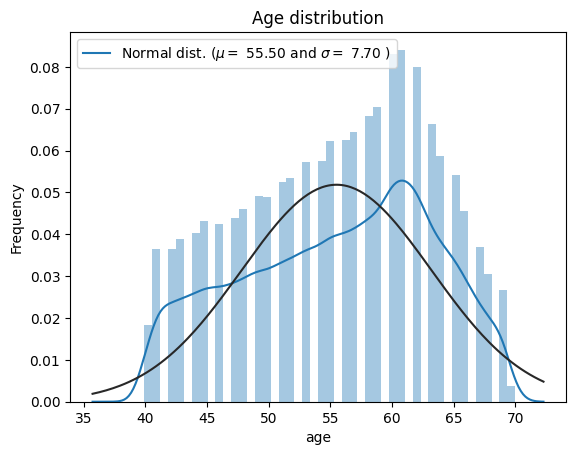

In [18]:
from scipy.stats import norm

# new_df.age.plot.density()
# plt.title('Age Distribution in the UK Biobank dataset')
# plt.show()

(mu, sigma) = norm.fit(new_df['age'])
sns.distplot(new_df['age'] , fit=norm)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [19]:
gender_col = new_df['gender'].astype(str)

In [20]:
gender_col.value_counts()

0    58052
1    45912
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender distribution in the UK Biobank dataset')

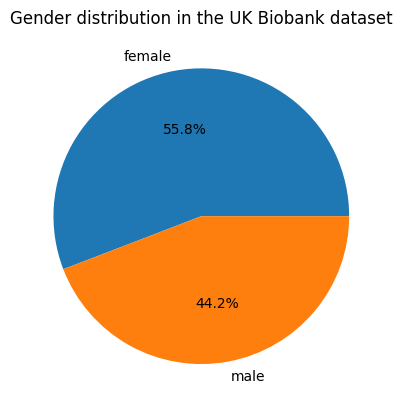

In [21]:
fig1, ax1 = plt.subplots()
labels = ['female', 'male']
ax1.pie(gender_col.value_counts(), labels=labels, autopct='%1.1f%%')
ax1.set_title('Gender distribution in the UK Biobank dataset')

# Check data normality

In [22]:
# FI
# plt.hist(df['20191-0.0'])
# plt.show()

# from scipy.stats import shapiro
# shapiro(df['20191-0.0'].dropna()) # ShapiroResult(statistic=0.9766396880149841, pvalue=0.0)

# from scipy.stats import kstest
# kstest(df['20191-0.0'].dropna(), 'norm') # KstestResult(statistic=0.9823087568599015, pvalue=0.0)

# Handle Missing Values